             Close    Open    High     Low          PP          R1  \
Date                                                                 
2020-05-04  747.40  740.00  763.90  690.20  733.833333  777.466667   
2020-05-05  739.60  768.65  787.55  726.10  751.083333  776.066667   
2020-05-06  781.25  733.95  795.00  721.75  766.000000  810.250000   
2020-05-07  755.60  771.00  807.00  745.15  769.250000  793.350000   
2020-05-08  744.40  774.50  789.00  733.35  755.583333  777.816667   
2020-05-11  736.15  759.80  767.90  726.05  743.366667  760.683333   
2020-05-12  670.10  709.00  709.35  644.00  674.483333  704.966667   
2020-05-13  671.65  703.10  722.95  663.60  686.066667  708.533333   
2020-05-14  648.20  695.05  720.00  642.15  670.116667  698.083333   
2020-05-15  641.35  641.75  659.90  626.25  642.500000  658.750000   
2020-05-18  576.15  643.00  644.40  573.60  598.050000  622.500000   
2020-05-19  587.10  588.00  621.00  576.55  594.883333  613.216667   
2020-05-20  578.80  

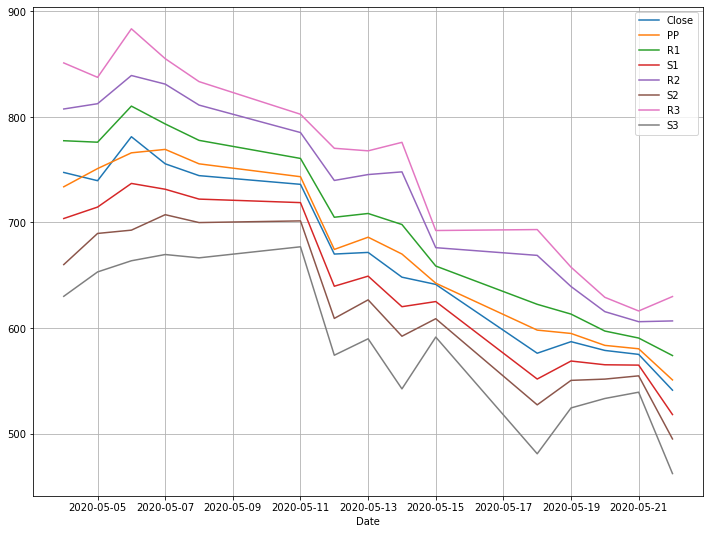

In [1]:
##Classic Method

import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from nsepy import get_history



def supres(data):  
    pivot_points = pd.Series((data['High'] + data['Low'] + data['Close']) / 3)  
    R1 = pd.Series(2 * pivot_points - data['Low'])  
    S1 = pd.Series(2 * pivot_points - data['High'])  
    R2 = pd.Series(pivot_points + data['High'] - data['Low'])  
    S2 = pd.Series(pivot_points - data['High'] + data['Low'])  
    R3 = pd.Series(data['High'] + 2 * (pivot_points - data['Low']))  
    S3 = pd.Series(data['Low'] - 2 * (data['High'] - pivot_points))  
    psr = {'PP':pivot_points, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    psr_df = pd.DataFrame(psr)  
    data= data.join(psr_df)  
    return data

data = get_history(symbol='SRTR',
                   start=date(2020,5,1),
                   end=date(2020,5,22))
data = data[['Close','Open','High','Low']]

req_out=supres(data)
print(req_out)

pd.concat([data['Close'],req_out.PP,req_out.R1,req_out.S1,req_out.R2,req_out.S2,req_out.R3,req_out.S3],axis=1).plot(figsize=(12,9),grid=True)
plt.show()

In [2]:
## Fibonnacci Retracement Method

             Close    Open    High     Low          PP          R1  \
Date                                                                 
2020-05-04  747.40  740.00  763.90  690.20  733.833333  777.466667   
2020-05-05  739.60  768.65  787.55  726.10  751.083333  776.066667   
2020-05-06  781.25  733.95  795.00  721.75  766.000000  810.250000   
2020-05-07  755.60  771.00  807.00  745.15  769.250000  793.350000   
2020-05-08  744.40  774.50  789.00  733.35  755.583333  777.816667   
2020-05-11  736.15  759.80  767.90  726.05  743.366667  760.683333   
2020-05-12  670.10  709.00  709.35  644.00  674.483333  704.966667   
2020-05-13  671.65  703.10  722.95  663.60  686.066667  708.533333   
2020-05-14  648.20  695.05  720.00  642.15  670.116667  698.083333   
2020-05-15  641.35  641.75  659.90  626.25  642.500000  658.750000   
2020-05-18  576.15  643.00  644.40  573.60  598.050000  622.500000   
2020-05-19  587.10  588.00  621.00  576.55  594.883333  613.216667   
2020-05-20  578.80  

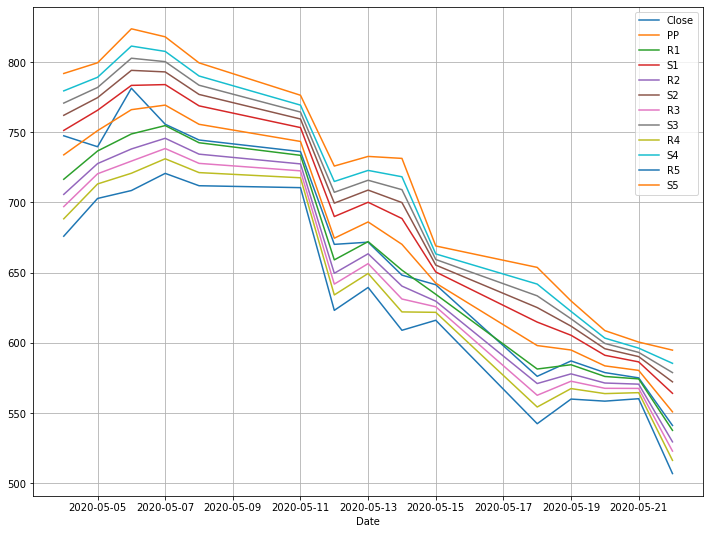

In [3]:
def fibret(data_fib):
    fib_retracement = [0.236, .382, .50, .618, .786]
    diff = data_fib['High'] - data_fib['Low']
    pivot_points = pd.Series((data_fib['High'] + data_fib['Low'] + data_fib['Close']) / 3)  
    R1 = pd.Series(pivot_points - diff*fib_retracement[0])  
    S1 = pd.Series(pivot_points + diff*fib_retracement[0])  
    R2 = pd.Series(pivot_points - diff*fib_retracement[1])  
    S2 = pd.Series(pivot_points + diff*fib_retracement[1])  
    R3 = pd.Series(pivot_points - diff*fib_retracement[2])  
    S3 = pd.Series(pivot_points + diff*fib_retracement[2]) 
    R4 = pd.Series(pivot_points - diff*fib_retracement[3])
    S4 = pd.Series(pivot_points + diff*fib_retracement[3])
    R5 = pd.Series(pivot_points - diff*fib_retracement[4])
    S5 = pd.Series(pivot_points + diff*fib_retracement[4])
    psr_fib = {'PP':pivot_points, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3, 'R4':R4, 'S4':S4, 'R5':R5, 'S5':S5}  
    psr_fib_df = pd.DataFrame(psr_fib)  
    data_fib = data_fib.join(psr_fib_df)  
    return data_fib
data_fib = get_history(symbol='SRTR',
                   start=date(2020,5,1),
                   end=date(2020,5,22))
data_fib = data_fib[['Close','Open','High','Low']]

req_out_fib=fibret(data_fib)
print(req_out)

pd.concat([data['Close'],req_out_fib.PP,req_out_fib.R1,req_out_fib.S1,req_out_fib.R2,req_out_fib.S2,req_out_fib.R3,req_out_fib.S3,req_out_fib.R4, req_out_fib.S4, req_out_fib.R5, req_out_fib.S5 ],axis=1).plot(figsize=(12,9),grid=True)
plt.show()